In [1]:
# Imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../data/cleaned_cdc.csv')

In [4]:
df.head()

,YearStart,LocationAbbr,LocationDesc,Data_Value,Sample_Size,GeoLocation,QuestionID,StratificationCategoryId1,StratificationID1
0,2011,AL,Alabama,32.0,7304.0,"(32.84057112200048, -86.63186076199969)",Q036,OVR,OVERALL
1,2011,AL,Alabama,32.3,2581.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,MALE
2,2011,AL,Alabama,31.8,4723.0,"(32.84057112200048, -86.63186076199969)",Q036,GEN,FEMALE
3,2011,AL,Alabama,33.6,1153.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHS
4,2011,AL,Alabama,32.8,2402.0,"(32.84057112200048, -86.63186076199969)",Q036,EDU,EDUHSGRAD


In [5]:
df.shape

(51404, 9)

In [6]:
df.isnull().sum()

YearStart                       0
LocationAbbr                    0
LocationDesc                    0
Data_Value                      0
Sample_Size                  4867
GeoLocation                     0
QuestionID                      0
StratificationCategoryId1       0
StratificationID1               0
dtype: int64

In [8]:
df.columns

Index(['YearStart', 'LocationAbbr', 'LocationDesc', 'Data_Value',
       'Sample_Size', 'GeoLocation', 'QuestionID', 'StratificationCategoryId1',
       'StratificationID1'],
      dtype='object')

In [10]:
df['Data_Value'].mean()

31.276000311260194

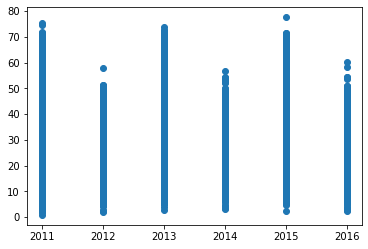

In [12]:
plt.scatter(df['YearStart'], df['Data_Value']);

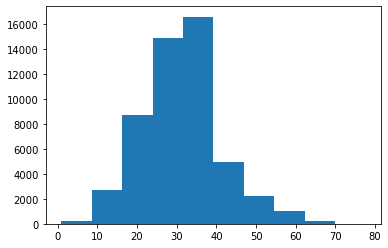

In [13]:
plt.hist(df['Data_Value']);

In [14]:
import re
df['GeoLocation'] = df['GeoLocation'].str.replace(r'[()]', '')

C:\Users\sbhew\AppData\Local\Temp\ipykernel_10292\12795041.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['GeoLocation'] = df['GeoLocation'].str.replace(r'[()]', '')


In [15]:
df['GeoLocation'].fillna('0, 0', inplace=True)

In [16]:

lat = [float(df['GeoLocation'][i].split(',')[0]) for i in range(len(df['GeoLocation']))]
long = [float(df['GeoLocation'][i].split(',')[1]) for i in range(len(df['GeoLocation']))]
    
df['lat'] = lat
df['long'] = long

In [17]:
df['GeoLocation'][0]

'32.84057112200048, -86.63186076199969'

In [19]:
df['QuestionID'].value_counts()

Q036    8568
Q037    8568
Q047    8568
Q019    4284
Q046    4284
Q043    4284
Q044    4284
Q045    4284
Q018    4280
Name: QuestionID, dtype: int64

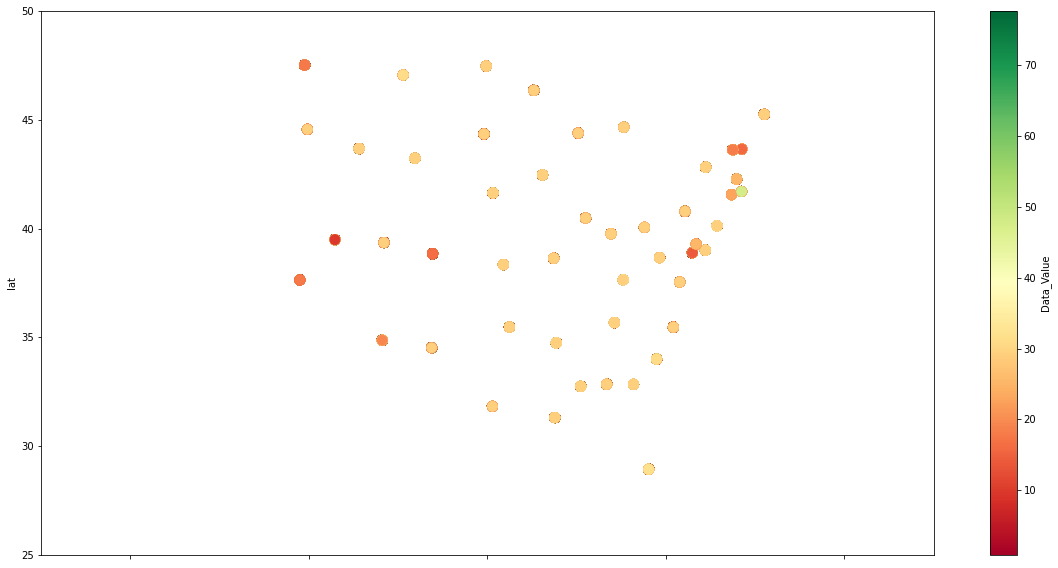

In [20]:
# Change long and lat to geolocation from data
df.plot(kind="scatter", x="long", y="lat", c="Data_Value",
         cmap="RdYlGn", figsize=(20, 10), s = 100)
plt.ylim([25, 50])
plt.xlim([-150, -50]);

In [21]:
df.dtypes

YearStart                      int64
LocationAbbr                  object
LocationDesc                  object
Data_Value                   float64
Sample_Size                  float64
GeoLocation                   object
QuestionID                    object
StratificationCategoryId1     object
StratificationID1             object
lat                          float64
long                         float64
dtype: object

In [22]:
df['long'].describe()

count    51404.000000
mean       -93.386650
std         18.842217
min       -157.857749
25%       -106.133611
50%        -89.538031
75%        -78.457890
max        -68.985031
Name: long, dtype: float64

In [23]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

from shapely.geometry import Point

%matplotlib inline

ModuleNotFoundError: No module named 'geopandas'

In [24]:
pip install geopandas

  Using cached geopandas-0.11.0-py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.21.tar.gz (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)
  Using cached Fiona-1.8.19.tar.gz (1.3 MB)
  Using cached Fiona-1.8.18.tar.gz (1.3 MB)
  Using cached Fiona-1.8.17.tar.gz (1.3 MB)
  Using cached Fiona-1.8.16.tar.gz (1.3 MB)
  Using cached Fiona-1.8.15.tar.gz (1.3 MB)
  Using cached Fiona-1.8.14.tar.gz (1.3 MB)
  Using cached Fiona-1.8.13.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.13.tar.gz (1.2 MB)
  Using cached Fiona-1.8.12.tar.gz (1.2 MB)
  Using cached Fiona-1.8.11.tar.gz (1.2 MB)
  Using cached Fiona-1.8.10.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post2.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.post1.tar.gz (1.2 MB)
  Using cached Fiona-1.8.9.tar.gz (1.2 MB)
  Using cached Fiona-1.8.8.tar.gz (1.7 MB)
  Using cached Fiona-1.8.7.tar.gz (1.7 MB)
  Using cached Fiona-1.8.6.tar.gz (1.7 MB)
  Using cached Fiona-1.8.5.tar.gz (1.7 MB)
  Using cached Fiona-1.8.4.tar.gz (1.1 MB)
  Using 

    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\sbhew\anaconda3\python.exe' -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\sbhew\\AppData\\Local\\Temp\\pip-install-vaq8d3il\\fiona_dda81f1ef6684064b29f1cbb93921fae\\setup.py'"'"'; __file__='"'"'C:\\Users\\sbhew\\AppData\\Local\\Temp\\pip-install-vaq8d3il\\fiona_dda81f1ef6684064b29f1cbb93921fae\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\sbhew\AppData\Local\Temp\pip-pip-egg-info-g9l2tkg2'
         cwd: C:\Users\sbhew\AppData\Local\Temp\pip-install-vaq8d3il\fiona_dda81f1ef6684064b29f1cbb93921fae\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment 